# Walmart Data: Preprocessing Notebook
## Robert Andrews | rea3ah@virginia.edu

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read in train data
time = pd.read_csv('train.csv')

In [3]:
time.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [4]:
# get info
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
# read in features data
feats = pd.read_csv('features.csv')

In [6]:
# view first three rows
feats.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [7]:
# get info
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# I. Initial Preprocessing

## Rename Columns

In [8]:
# convert to lower case
feats.columns = feats.columns.str.lower()
time.columns = time.columns.str.lower()

In [9]:
# view feats column names
feats.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')

In [10]:
# view time column names
time.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday'], dtype='object')

## Copy Time and Feats in Case of Errors

In [11]:
# feats copy
feats_ppc = feats.copy()

# time copy 
time_ppc = time.copy()

## a) Handle Duplicates and Missing Data

### Features Set

In [12]:
dupes = len(feats_ppc) - len(feats_ppc.drop_duplicates())

In [13]:
# show dupes
dupes

0

In [14]:
# countmissing values
feats_ppc.isna().sum()

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64

<AxesSubplot:>

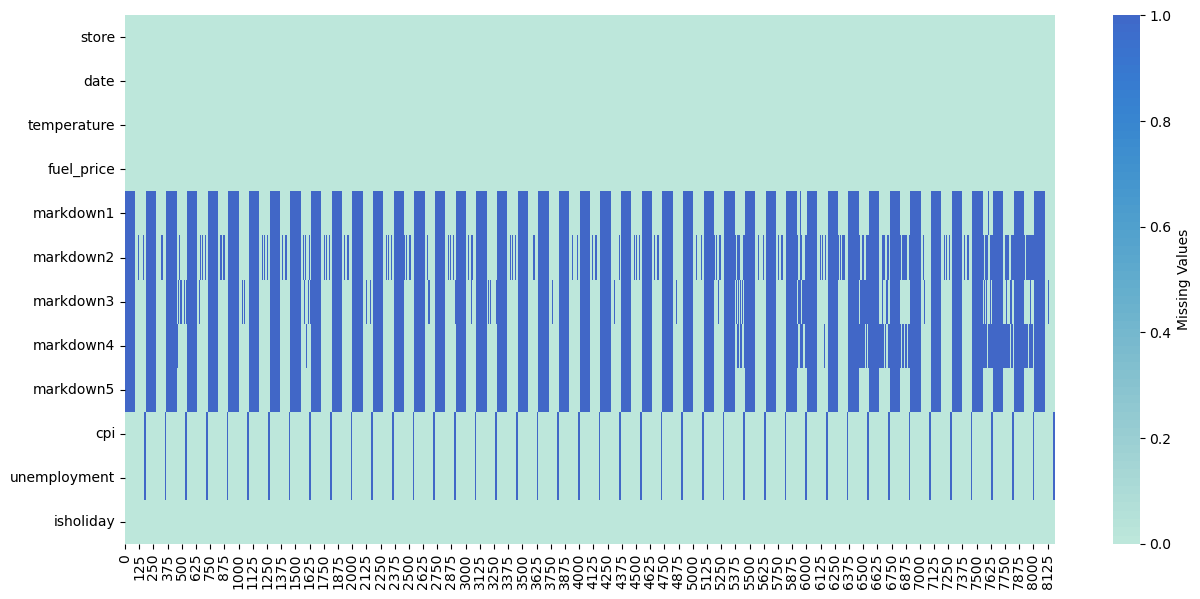

In [15]:
# visualize concentration of missing values
plt.figure(figsize=(15,7), dpi=100)
sns.heatmap(feats_ppc.isna().transpose(),
            center=2,
            cbar_kws={'label': 'Missing Values'})

In [16]:
# drop markdown columns
feats_ppc = feats_ppc[['store','date','temperature','fuel_price','cpi','unemployment','isholiday']]

In [17]:
# view first five rows
feats_ppc.head(5)

,store,date,temperature,fuel_price,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [18]:
# view cleaned feates data
feats_clean = feats_ppc.dropna(axis=0)

In [19]:
# view cleaned feats data
feats_clean.head(5)

,store,date,temperature,fuel_price,cpi,unemployment,isholiday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


<AxesSubplot:>

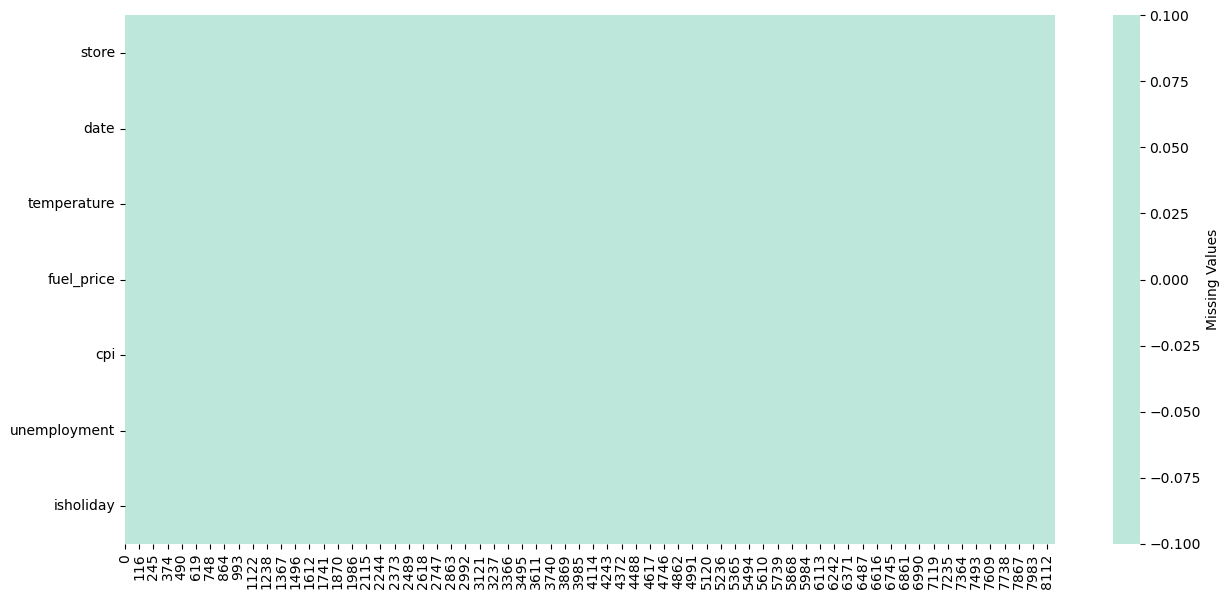

In [20]:
# visualize concentration of missing values
plt.figure(figsize=(15,7), dpi=100)
sns.heatmap(feats_clean.isna().transpose(),
            center=2,
            cbar_kws={'label': 'Missing Values'})

In [21]:
# get dimensions of cleaned features data
feats_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         7605 non-null   int64  
 1   date          7605 non-null   object 
 2   temperature   7605 non-null   float64
 3   fuel_price    7605 non-null   float64
 4   cpi           7605 non-null   float64
 5   unemployment  7605 non-null   float64
 6   isholiday     7605 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 681.4+ KB


In [22]:
# get count of unique stores
count = feats_clean.store.unique().size

In [23]:
# show count
count

45

In [24]:
# view random sample of ten rows
feats_ppc.sample(n=10)

,store,date,temperature,fuel_price,cpi,unemployment,isholiday
4203,24,2010-06-04,71.99,3.006,132.364839,8.211,False
7447,41,2013-04-19,26.84,3.603,201.070571,5.639,False
394,3,2010-09-03,84.16,2.577,214.848169,7.346,False
3847,22,2010-07-30,76.35,2.792,136.455402,8.433,False
385,3,2010-07-02,82.20,2.669,214.546322,7.346,False
4378,25,2010-04-16,52.16,2.899,203.730749,7.856,False
4278,24,2011-11-11,46.78,3.719,136.461806,8.454,False
4821,27,2011-10-21,59.62,3.757,140.461605,7.906,False
4213,24,2010-08-13,74.17,2.923,132.630000,8.117,False
332,2,2012-12-21,55.14,3.098,223.472864,6.170,False


### Time Series Set

In [25]:
dupes_time = len(time_ppc) - len(time_ppc.drop_duplicates())

In [26]:
dupes_time

0

In [27]:
# countmissing values
time_ppc.isna().sum()

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
dtype: int64

<AxesSubplot:>

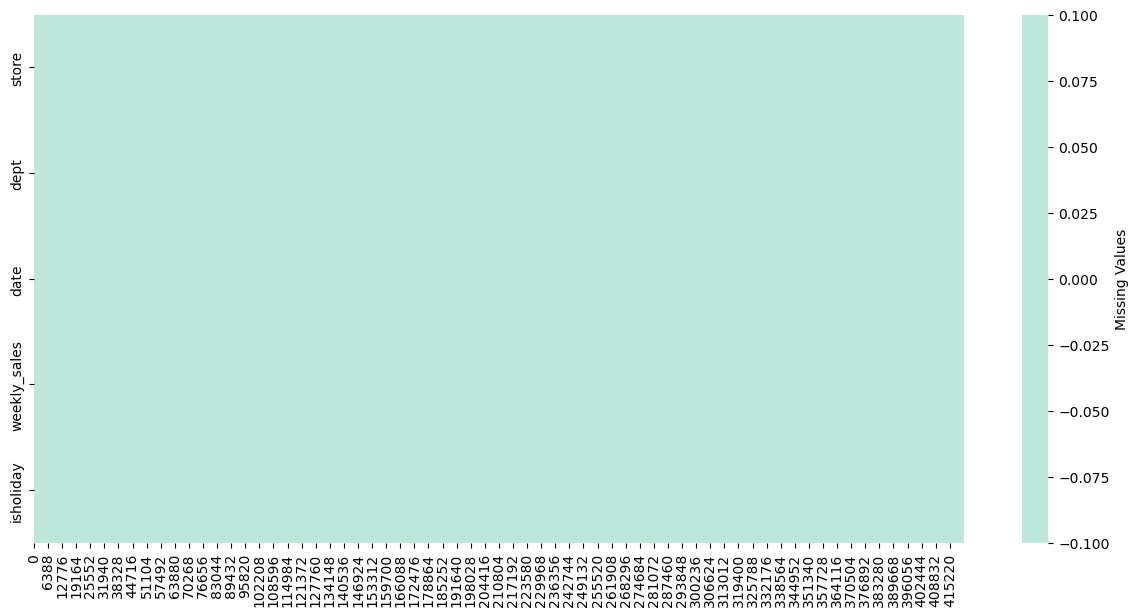

In [28]:
# visualize concentration of missing values
plt.figure(figsize=(15,7), dpi=100)
sns.heatmap(time_ppc.isna().transpose(),
            center=2,
            cbar_kws={'label': 'Missing Values'})

In [29]:
# view random sample of ten rows
time_ppc.sample(n=10)

,store,dept,date,weekly_sales,isholiday
37336,4,74,2010-10-01,18710.42,False
34427,4,36,2011-05-13,2767.00,False
410120,44,82,2010-12-03,3655.67,False
396360,42,83,2011-03-25,3840.00,False
144020,15,49,2010-07-30,10312.17,False
226674,23,97,2011-06-03,8003.92,False
8613,1,83,2012-01-13,6581.56,False
17371,2,59,2011-03-11,537.62,False
404139,43,94,2011-11-25,45643.70,True
48078,5,91,2011-09-23,1391.87,False


## b) Standardize Features Set Inflation Column

# II. Merge Features and Time Series Sets

In [30]:
# view dims of feats_ppc
feats_ppc.shape

(8190, 7)

In [31]:
# view dims of time_ppc
time_ppc.shape

(421570, 5)

In [32]:
# get column names from both datasets
feats_ppc.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')

In [33]:
# same for time
time_ppc.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday'], dtype='object')

In [34]:
# conduct inner join on store and dates
df_joined = time_ppc.merge(feats_ppc, on=['store', 'date'], how='inner')

In [35]:
# get dimensions of joined df
df_joined.shape

(421570, 10)

In [36]:
# show columns
df_joined.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday_x', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'isholiday_y'],
      dtype='object')

In [37]:
# pull random sample of 20 rows
df_joined.sample(n=7)

,store,dept,date,weekly_sales,isholiday_x,temperature,fuel_price,cpi,unemployment,isholiday_y
295146,31,30,2010-06-25,3190.33,False,87.01,2.653,210.995013,8.200,False
225910,23,17,2012-07-27,25012.67,False,69.31,3.701,138.203387,4.156,False
150129,16,85,2010-09-17,2940.45,False,56.55,2.800,190.468829,6.868,False
39544,4,46,2012-10-05,36627.39,False,63.07,3.620,131.075667,3.879,False
5764,1,49,2011-08-19,13037.99,False,89.94,3.554,215.669311,7.962,False
100180,11,36,2010-09-24,677.50,False,77.36,2.624,214.908452,7.346,False
245923,25,60,2012-07-20,207.00,False,74.32,3.567,214.733135,7.280,False


In [38]:
# drop extra isholiday_y
df_joined = df_joined[['store', 'dept', 'date', 'weekly_sales', 'isholiday_x', 'temperature',
       'fuel_price', 'cpi', 'unemployment']]

In [39]:
# rename isholiday_x to holiday
# use 'inplace=True' to make change permanent
df_joined.rename(columns={"isholiday_x": "holiday"}, inplace = True)

In [40]:
df_joined.head(3)

,store,dept,date,weekly_sales,holiday,temperature,fuel_price,cpi,unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106


In [41]:
df_joined.dtypes

store             int64
dept              int64
date             object
weekly_sales    float64
holiday            bool
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
dtype: object

# III. Convert Data Types

In [42]:
# convert store and dept to categories
df_joined['store'] = df_joined['store'].astype("category")

In [43]:
# view type
df_joined.dtypes

store           category
dept               int64
date              object
weekly_sales     float64
holiday             bool
temperature      float64
fuel_price       float64
cpi              float64
unemployment     float64
dtype: object

In [44]:
# convert dept to categorical
df_joined['dept'] = df_joined['dept'].astype("category")

In [45]:
# check dtypes
df_joined.dtypes

store           category
dept            category
date              object
weekly_sales     float64
holiday             bool
temperature      float64
fuel_price       float64
cpi              float64
unemployment     float64
dtype: object

In [46]:
# convert date to time series
df_joined['date']=pd.to_datetime(df_joined.date)

In [47]:
# check dtypes
df_joined.dtypes

store                 category
dept                  category
date            datetime64[ns]
weekly_sales           float64
holiday                   bool
temperature            float64
fuel_price             float64
cpi                    float64
unemployment           float64
dtype: object

In [48]:
# view data dimsensions
df_joined.shape

(421570, 9)

In [49]:
# view 7 random rows to check for correctness
df_joined.sample(n=7)

,store,dept,date,weekly_sales,holiday,temperature,fuel_price,cpi,unemployment
303011,31,9,2012-08-10,10192.83,False,89.57,3.494,221.595414,6.565
270805,28,12,2011-02-18,3718.53,False,53.35,3.430,127.995250,14.021
352820,37,96,2012-06-29,19707.82,False,86.68,3.286,220.527880,6.989
76054,8,26,2012-02-10,8684.21,True,35.71,3.409,223.802451,5.825
19708,2,18,2012-08-17,6.97,False,84.79,3.571,221.675146,6.565
397484,42,60,2012-08-17,198.00,False,88.83,4.002,130.790968,7.170
264759,27,96,2012-03-23,16758.13,False,57.30,4.054,141.626933,8.009


# IV. Standardize Feature Variables

In [50]:
# look at existing feature distributions

In [51]:
# plot feats against sales
df_joined.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [52]:
# view summary of quantitative variables
df_joined.describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,3.361027,171.201947,7.960289
std,22711.183519,18.447931,0.458515,39.159276,1.863296
min,-4988.940000,-2.060000,2.472000,126.064000,3.879000
25%,2079.650000,46.680000,2.933000,132.022667,6.891000
50%,7612.030000,62.090000,3.452000,182.318780,7.866000
75%,20205.852500,74.280000,3.738000,212.416993,8.572000
max,693099.360000,100.140000,4.468000,227.232807,14.313000


In [53]:
# reorder data to prepare for standardization code
df_joined = df_joined.loc[:,['store','dept','date','cpi','fuel_price','unemployment','temperature','holiday','weekly_sales']]

In [54]:
# check range of quantitative predictor keys
df_joined.keys()[3:-2] # begins with 4th key in the df and goes through second to last

Index(['cpi', 'fuel_price', 'unemployment', 'temperature'], dtype='object')

In [55]:
# standardize the data
# recommend reordering or filtering out non-quantitative columns before running
    # this code block
    
'''
Standardization Code c/o
Professor William Basener
University of Virginia, School of Data Science
'''
# Standardize cpi, fuel_price, unemployment, temperature

for key in df_joined.keys()[3:-2]:
    try:
        print("Standardizing "+key+".")
        df_joined[key] = df_joined[key] - np.mean(df_joined[key])
        df_joined[key] = df_joined[key] / np.std(df_joined[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical or time-series variable).")


Standardizing cpi.
Standardizing fuel_price.
Standardizing unemployment.
Standardizing temperature.


In [56]:
# check standardization 
df_joined.describe()

,cpi,fuel_price,unemployment,temperature,weekly_sales
count,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,421570.000000
mean,9.821559e-16,9.470982e-16,-4.816393e-16,-8.667351e-16,15981.258123
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,22711.183519
min,-1.152677e+00,-1.938930e+00,-2.190362e+00,-3.368949e+00,-4988.940000
25%,-1.000512e+00,-9.335081e-01,-5.738701e-01,-7.269148e-01,2079.650000
50%,2.838879e-01,1.984094e-01,-5.060323e-02,1.084102e-01,7612.030000
75%,1.052499e+00,8.221635e-01,3.282957e-01,7.691897e-01,20205.852500
max,1.430847e+00,2.414263e+00,3.409399e+00,2.170975e+00,693099.360000


# V. Exploratory Data Analysis

**response: weekly_sales
quantitative features: 
-cpi
-fuel_price
-unemployment
-temperature
categorical/time features:
-date
-store
-dept
-holiday**

In [57]:
# generate a small sample for plots
df_sample = df_joined.groupby('store', group_keys=False).apply(lambda x: x.sample(frac=0.025, random_state=123))

In [58]:
# get shape
df_sample.shape

(10541, 9)

C:\Users\Robert\AppData\Local\Temp/ipykernel_22328/3404659959.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_joined.corr()


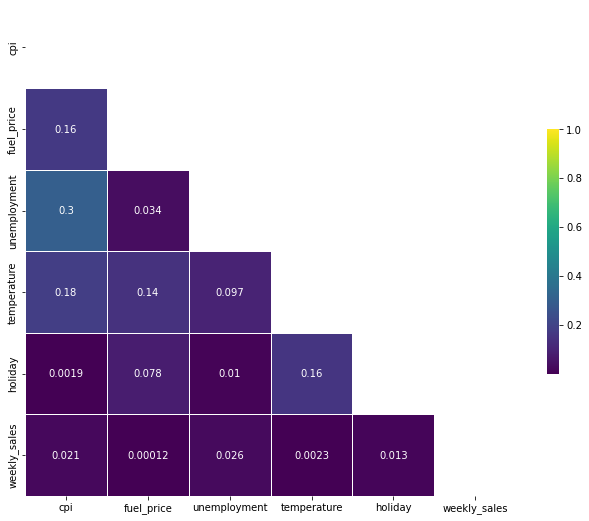

In [59]:
#correlation matrix
# create correlation matrix for the numerical data
corr = df_joined.corr()

# use mask to hide upper triangle of matrix
mask = np.tri(*corr.shape).T

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap= 'viridis',
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.5},
            ax=ax,);

In [60]:
df_sample.dtypes

store                 category
dept                  category
date            datetime64[ns]
cpi                    float64
fuel_price             float64
unemployment           float64
temperature            float64
holiday                   bool
weekly_sales           float64
dtype: object

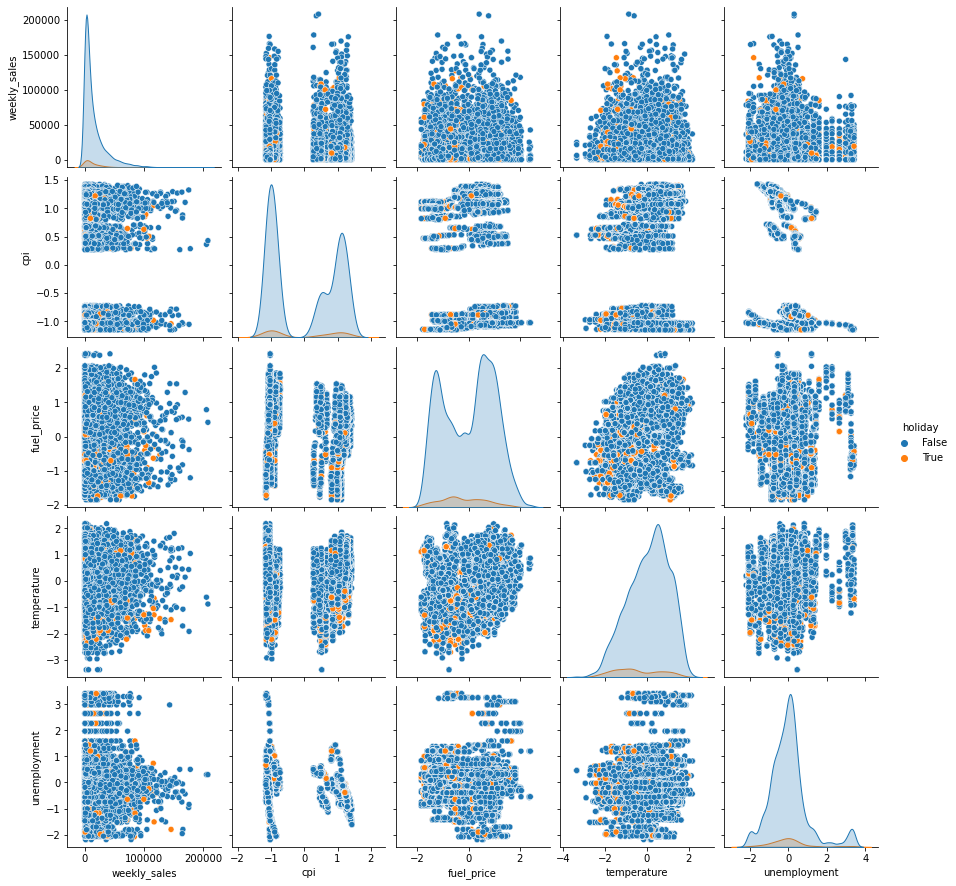

In [61]:
# evaluate numeric data distributions for imputation
sns.pairplot(df_sample[['weekly_sales','cpi','fuel_price','temperature','unemployment','holiday']],hue='holiday')

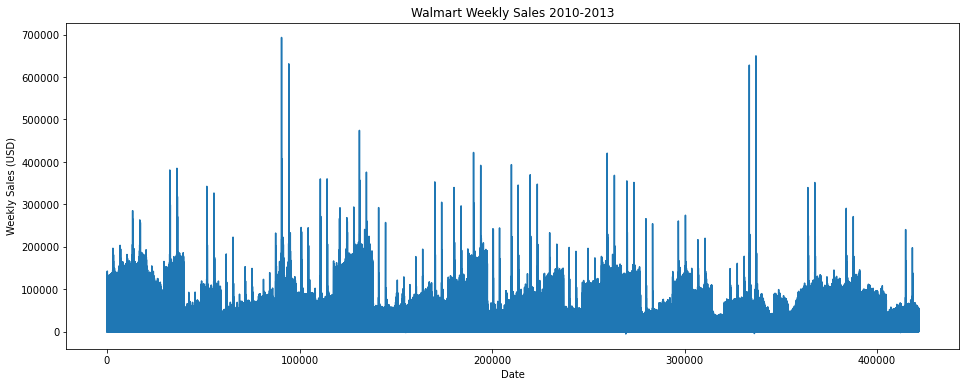

In [62]:
plt.figure(figsize=(16,6))
df_joined['weekly_sales'].plot()
plt.xlabel('Date')
plt.ylabel('Weekly Sales (USD)')
plt.title('Walmart Weekly Sales 2010-2013')
plt.show()

In [63]:
df_sample.dtypes

store                 category
dept                  category
date            datetime64[ns]
cpi                    float64
fuel_price             float64
unemployment           float64
temperature            float64
holiday                   bool
weekly_sales           float64
dtype: object

In [64]:
df_sample.set_index('date', inplace=True) #seting date as index

In [65]:
# resample the data weekly
df_week = df_sample.resample('W').mean() #resample data as weekly

C:\Users\Robert\AppData\Local\Temp/ipykernel_22328/988652122.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week = df_sample.resample('W').mean() #resample data as weekly


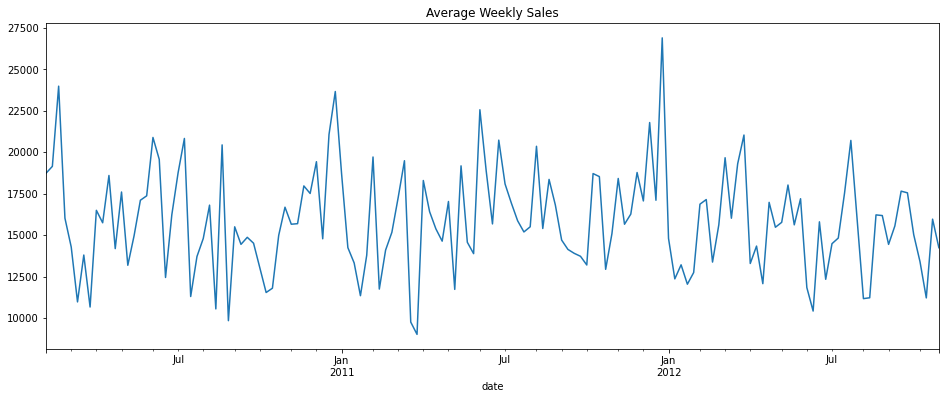

In [66]:
plt.figure(figsize=(16,6))
df_week['weekly_sales'].plot()
plt.title('Average Weekly Sales')
plt.show()

# VI. Prepare Cleaned Data for Time Series Analysis

In [67]:
# view df_joined
df_joined

,store,dept,date,cpi,fuel_price,unemployment,temperature,holiday,weekly_sales
0,1,1,2010-02-05,1.018774,-1.720834,0.078201,-0.963798,False,24924.50
1,1,2,2010-02-05,1.018774,-1.720834,0.078201,-0.963798,False,50605.27
2,1,3,2010-02-05,1.018774,-1.720834,0.078201,-0.963798,False,13740.12
3,1,4,2010-02-05,1.018774,-1.720834,0.078201,-0.963798,False,39954.04
4,1,5,2010-02-05,1.018774,-1.720834,0.078201,-0.963798,False,32229.38
...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,0.539003,1.136222,0.379281,-0.067219,False,2487.80
421566,45,94,2012-10-26,0.539003,1.136222,0.379281,-0.067219,False,5203.31
421567,45,95,2012-10-26,0.539003,1.136222,0.379281,-0.067219,False,56017.47
421568,45,97,2012-10-26,0.539003,1.136222,0.379281,-0.067219,False,6817.48


In [68]:
 df_time = df_joined.copy()

In [70]:
df_time.sample(n=7)

,store,dept,date,cpi,fuel_price,unemployment,temperature,holiday,weekly_sales
33268,4,12,2011-02-04,-1.110399,-0.796108,-0.778347,-1.381190,False,7116.65
37824,4,58,2012-04-20,-1.023631,1.096964,-1.960125,0.461296,False,4030.00
97355,10,21,2012-09-14,-1.027198,1.319422,-0.424135,0.996316,False,7857.28
210962,22,34,2011-03-04,-0.860595,0.165695,0.267114,-1.440275,False,17574.17
309585,32,21,2011-08-19,0.588574,0.300914,0.355130,0.738834,False,4887.34
218094,23,9,2010-06-11,-0.989963,-1.158147,-1.355282,-0.094323,False,75545.48
247406,26,24,2010-03-26,-1.004586,-1.155966,0.283214,-1.345955,False,2230.19


In [82]:
# drop store and dept
# aggregate by date
# mean cpi, fuel_price, unemployment, temperature
# mode holiday
# sum for weekly sales
# collapse on
walmart = df_time.groupby('date').agg({'cpi':'mean',
                             'fuel_price':'mean',
                             'unemployment':'mean',
                             'temperature':'mean',
                             'holiday':'max',
                             'weekly_sales':'sum',
})

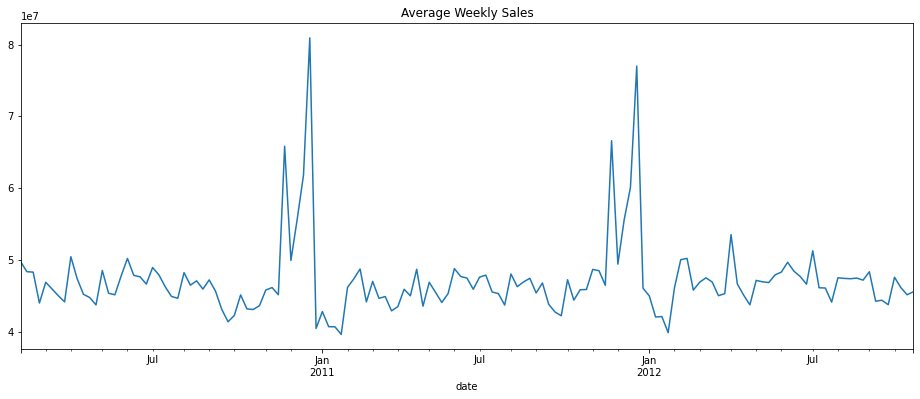

In [83]:
plt.figure(figsize=(16,6))
walmart['weekly_sales'].plot()
plt.title('Average Weekly Sales')
plt.show()

# VII. Export Transformed Data

In [85]:
# save newly transformed data data
walmart.to_csv('walmart_clean.csv')